# Transfer learning with MobileNetv2

In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import torch
from torch import nn

from torch.utils.data import DataLoader, ConcatDataset 

import torchvision

from torchvision.transforms import v2

from pathlib import Path

from matplotlib import pyplot as plt

from PIL import Image

import pandas as pd

import time

import multiprocessing

# Functions

In [3]:
from r_utils import prepare_and_get_data_path, load_data, find_device, load_model, train, evaluate, plot_standard

# TensorBoard

In [4]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/animal_data')

In [5]:
%load_ext tensorboard
%tensorboard --logdir runs

Launching TensorBoard...

# Device

In [6]:
device = find_device()

print(f'device: {device}')

device: cuda


# Data

In [7]:
data_path = prepare_and_get_data_path('pc')

In [8]:
train_data_loader, valid_data_loader, test_data_loader = load_data(data_path)

tensor(4)


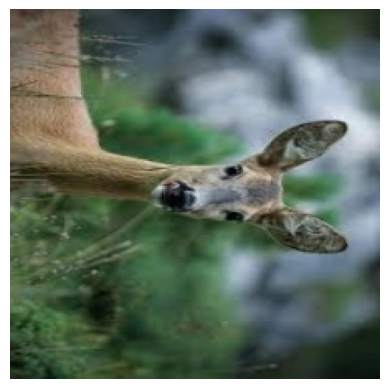

In [9]:
for tensor_image, label in train_data_loader:
    figure, axes = plt.subplots(1,1)

    axes.imshow(torchvision.transforms.ToPILImage()(tensor_image[0]))
    axes.set_axis_off()
    print(label[0])
    break

# Model

In [10]:
model = load_model(device)
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train

In [11]:
losses = []

train_accuracies = []
train_losses = []

valid_accuracies = []
valid_losses = []

for epoch in range(5):
    print(f'in epoch: {epoch}')
    l1 = train(model, train_data_loader, loss_fn,
               optimizer, device)
    losses += l1

    accuracy, loss = evaluate(model, train_data_loader, loss_fn, device)
    print(f'train -> accuracy: {accuracy:.2f}, loss: {loss:.2f}')

    train_accuracies.append(accuracy)
    train_losses.append(loss)

    accuracy, loss = evaluate(model, valid_data_loader, loss_fn, device)
    print(f'validation -> accuracy: {accuracy:.2f}, loss: {loss:.2f}')

    valid_accuracies.append(accuracy)
    valid_losses.append(loss)

    print('********')

in epoch: 0


37/37, loss = 0.868555, time_taken: 3.21, predicting_remaining_time: 0m 00s
37/37, time_taken: 2.88, predicting_remaining_time: 0m 00s
train -> accuracy: 0.91, loss: 0.76
13/13, time_taken: 0.97, predicting_remaining_time: 0m 00s
validation -> accuracy: 0.88, loss: 0.81
********
in epoch: 1
37/37, loss = 0.613619, time_taken: 3.21, predicting_remaining_time: 0m 00s
37/37, time_taken: 2.89, predicting_remaining_time: 0m 00s
train -> accuracy: 0.96, loss: 0.39
13/13, time_taken: 0.96, predicting_remaining_time: 0m 00s
validation -> accuracy: 0.92, loss: 0.44
********
in epoch: 2
37/37, loss = 0.301462, time_taken: 3.21, predicting_remaining_time: 0m 00s
37/37, time_taken: 2.89, predicting_remaining_time: 0m 00s
train -> accuracy: 0.96, loss: 0.28
13/13, time_taken: 0.96, predicting_remaining_time: 0m 00s
validation -> accuracy: 0.94, loss: 0.34
********
in epoch: 3
37/37, loss = 0.099824, time_taken: 3.22, predicting_remaining_time: 0m 00s
37/37, time_taken: 2.93, predicting_remaining_ti

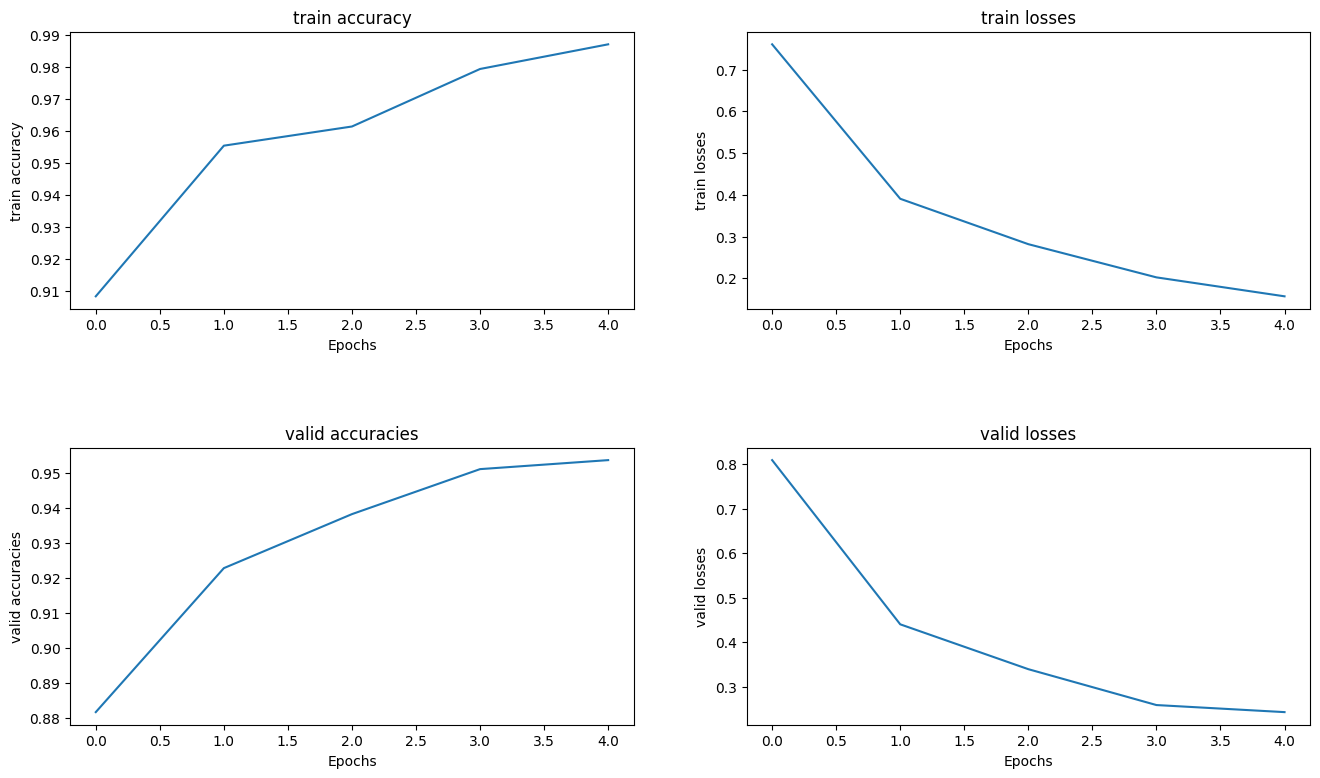

In [28]:
figure, axes = plt.subplots(2, 2, figsize=(16, 9))
figure.subplots_adjust(hspace=0.5)
plot_standard(axes[0, 0], train_accuracies, 'train accuracy')
plot_standard(axes[0, 1], train_losses, 'train losses')
plot_standard(axes[1, 0], valid_accuracies, 'valid accuracies')
plot_standard(axes[1, 1], valid_losses, 'valid losses')

plt.show()

# Test

In [32]:
accuracy, loss = evaluate(model, test_data_loader, loss_fn, device=device)
print(f'test -> accuracy: {accuracy:.2f}, loss: {loss:.2f}')

13/13, time_taken: 0.95, predicting_remaining_time: 0m 00s
test -> accuracy: 0.97, loss: 0.20
